# 2. Dimensionality Reduction - PCA

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [12]:
# Load dataset
df = pd.read_csv('../data/heart_disease.csv')
X = df.drop('target', axis=1)
y = df['target']

In [13]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0.0,6.0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,0.241935,2,3.0,3.0
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,0.419355,2,2.0,7.0
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0.0,3.0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1,1,0.150943,0.315068,0,0,0.465649,0,0.193548,2,0.0,7.0
299,0.812500,1,4,0.471698,0.152968,1,0,0.534351,0,0.548387,2,2.0,7.0
300,0.583333,1,4,0.339623,0.011416,0,0,0.335878,1,0.193548,2,1.0,7.0
301,0.583333,0,2,0.339623,0.251142,0,2,0.786260,0,0.000000,2,1.0,3.0


In [14]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [15]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

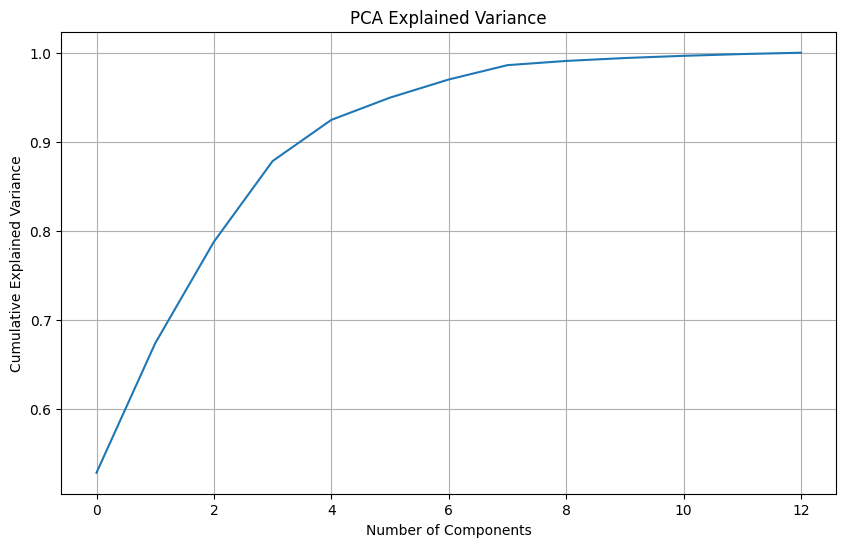

In [16]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

In [17]:
# Choose optimal number of components
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

Optimal number of components: 7


In [18]:
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X)

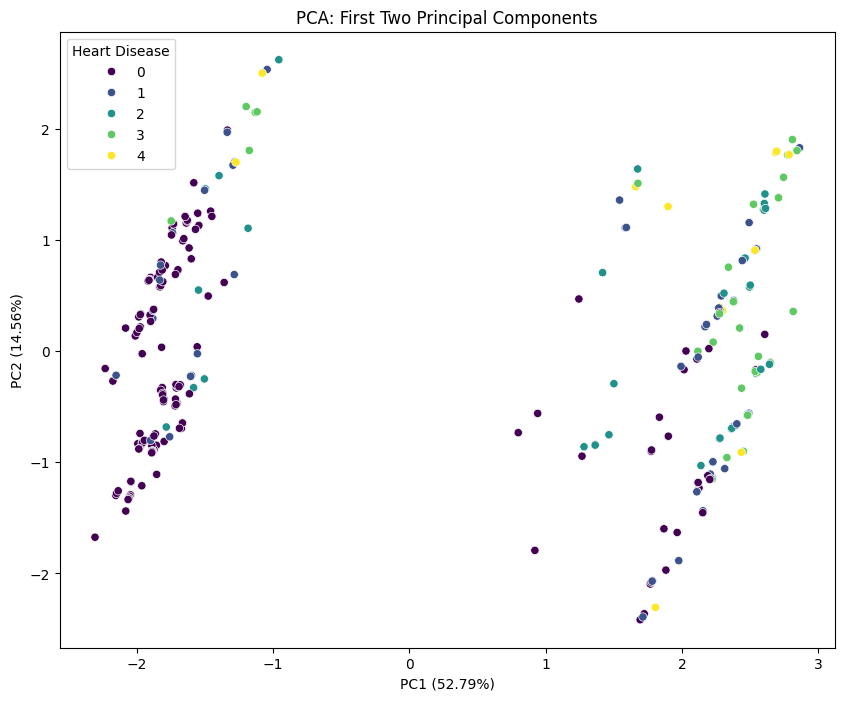

In [19]:
pca_df = pd.DataFrame(data=X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['target'] = y.values



plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.legend(title='Heart Disease')
plt.show()

In [20]:
X_pca_reduced

array([[ 0.94191136, -0.55978037, -2.63323206, ...,  1.3436689 ,
         0.04965025, -0.30515281],
       [-0.95752304,  2.62309441,  0.96524636, ...,  0.41638001,
         0.72783801,  0.18107936],
       [ 2.70879913,  1.38516111,  0.05095088, ...,  0.07509153,
         0.27138696,  0.21846558],
       ...,
       [ 2.48231523, -0.57644779,  0.9992744 , ...,  0.28977159,
         0.32986692,  0.22156309],
       [-1.8250448 ,  0.77499   , -1.0674829 , ...,  0.5266779 ,
        -0.5315513 ,  0.10187485],
       [-1.8897277 , -0.91408414,  0.53258215, ..., -0.42083121,
         0.36450043, -0.3147267 ]])